<a href="https://colab.research.google.com/github/Ayyoubbenrguig/Ayyoubbenrguig/blob/main/Copy_of_0_bases_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/hdakhli/mlops-2023/blob/main/0_bases_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Les bases pandas :
## [Documentation officielle](https://pandas.pydata.org/docs/reference/index.html)

In [98]:
#!pip install pandas
#!pip install xlrd
#!pip install matplotlib

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### 1. Les opérations de base avec les Dataframe

In [100]:
# Charger les données titanic.xls dans un Dataframe
Data= pd.read_excel("/content/titanic(2)(1).xls")

### Data Pre-processing:

In [101]:
# Evaluation of missing data
missing_data = Data.isnull()
missing_data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,False,False,False,False,True,False,True,False,True
1305,False,False,False,False,True,False,False,False,False,True,False,True,True,True
1306,False,False,False,False,False,False,False,False,False,True,False,True,False,True
1307,False,False,False,False,False,False,False,False,False,True,False,True,True,True


In [102]:
###  replace the missing value

meann = Data["age"].mean()

Data["age"].replace("?", np.nan)
Data = Data.replace(np.nan, meann)
Data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,29.881135,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,29.881135,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,29.881135,29.881135,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,29.881135,135.000000,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,29.881135,29.881135,"Montreal, PQ / Chesterville, ON"


In [103]:
# Afficher les dimensions du Dataframe
dim = Data.shape
dim



(1309, 14)

In [104]:
# Afficher le nombre de colonnes
len(Data.columns)
dim[1]

14

In [105]:
# Lister les noms des colonnes
colonnes = list(map(str, Data.columns))
colonnes


['pclass',
 'survived',
 'name',
 'sex',
 'age',
 'sibsp',
 'parch',
 'ticket',
 'fare',
 'cabin',
 'embarked',
 'boat',
 'body',
 'home.dest']

In [106]:
# Afficher les statistiques pour chaque donnée
Data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.292871,41.983795
std,0.837836,0.486055,12.883199,1.041658,0.865560,51.738965,48.113108
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,29.881135
50%,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200,29.881135
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,29.881135
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [107]:
# Classer le dataframe par "age" et par "pclass" par ordre croissant
Data_sorted = Data.sort_values(by=["age", "pclass"], ascending=[True, True])
Data_sorted.head(4)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
763,3,1,"Dean, Miss. Elizabeth Gladys ""Millvina""",female,0.1667,1,2,C.A. 2315,20.5750,29.881135,S,10,29.881135,"Devon, England Wichita, KS"
747,3,0,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.3333,0,2,347080,14.4000,29.881135,S,29.881135,29.881135,"Stanton, IA"
1240,3,1,"Thomas, Master. Assad Alexander",male,0.4167,0,1,2625,8.5167,29.881135,C,16,29.881135,29.881135
427,2,1,"Hamalainen, Master. Viljo",male,0.6667,1,1,250649,14.5000,29.881135,S,4,29.881135,"Detroit, MI"


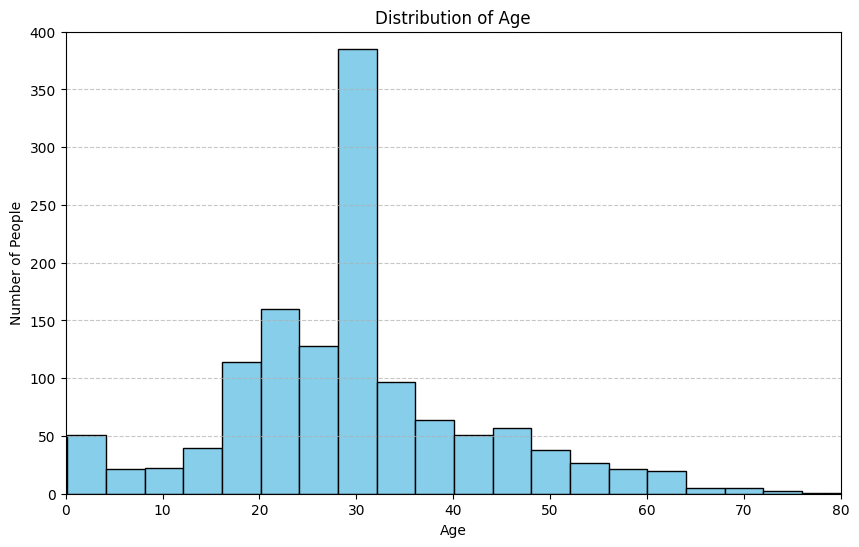

In [108]:
# Afficher l'histogramme des ages

plt.figure(figsize=(10, 6))
plt.hist(Data_sorted["age"], bins=20, color='skyblue', edgecolor='black')

# Ajouter un titre et des étiquettes d'axes

plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number of People')

# Personnaliser les limites des axes

plt.xlim(0, Data_sorted["age"].max())
plt.ylim(0, 400)

# Ajouter une grille en arrière-plan

plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()


In [109]:
# La moyenne d'age par "sex" et par "pclass"
moyen_age_sex_pclass = Data_sorted.groupby(['sex','pclass'])['age'].mean()
moyen_age_sex_pclass

sex     pclass
female  1         36.490920
        2         27.566605
        3         24.465552
male    1         39.285410
        2         30.744375
        3         27.106930
Name: age, dtype: float64

In [110]:
# Le nombre de passagers par "pclass"
nb_passager = Data_sorted.groupby("pclass")["name"].count()
#  nb_passager = Data_sorted["pclass"].value_counts()         2 ème méthode
nb_passager

pclass
1    323
2    277
3    709
Name: name, dtype: int64

In [111]:
# Lister le nombre de passagers par "pclass" qui ont moins de 18 ans

# Filtrer les passagers de moins de 18 ans
passagers_moins_18 = Data_sorted[Data_sorted['age'] < 18]

# Compter le nombre de passagers par "pclass" parmi les passagers de moins de 18 ans
nb_non_adult_pcalss = passagers_moins_18['pclass'].value_counts()
nb_non_adult_pcalss




3    106
2     33
1     15
Name: pclass, dtype: int64

In [112]:
Data_sorted.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [113]:
Data_sorted.shape


(1309, 14)

In [114]:
# Créer une colonne contenant les tranches d'age suivantes :
# age <= 20 ans; 20 < age <= 30; 30 < age <= 40; +40 ans

# Définir les intervalles et les étiquettes

intervalles = [0, 20, 30, 40, float('inf')]
etiquettes = ['<= 20 ans', '20-30 ans', '30-40 ans', '+40 ans']


Data_sorted['tranche_age'] = pd.cut(Data_sorted['age'], bins=intervalles, labels=etiquettes, right=False)

# Afficher le DataFrame avec la nouvelle colonne de tranches d'âge
Data_sorted.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,tranche_age
763,3,1,"Dean, Miss. Elizabeth Gladys ""Millvina""",female,0.1667,1,2,C.A. 2315,20.5750,29.881135,S,10,29.881135,"Devon, England Wichita, KS",<= 20 ans
747,3,0,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.3333,0,2,347080,14.4000,29.881135,S,29.881135,29.881135,"Stanton, IA",<= 20 ans
1240,3,1,"Thomas, Master. Assad Alexander",male,0.4167,0,1,2625,8.5167,29.881135,C,16,29.881135,29.881135,<= 20 ans
427,2,1,"Hamalainen, Master. Viljo",male,0.6667,1,1,250649,14.5000,29.881135,S,4,29.881135,"Detroit, MI",<= 20 ans
657,3,1,"Baclini, Miss. Eugenie",female,0.7500,2,1,2666,19.2583,29.881135,C,C,29.881135,"Syria New York, NY",<= 20 ans


In [115]:
selected_columns = ['pclass', 'survived', 'sex', 'age','tranche_age']
new_Data = Data_sorted[selected_columns]
new_Data.head()



,pclass,survived,sex,age,tranche_age
763,3,1,female,0.1667,<= 20 ans
747,3,0,male,0.3333,<= 20 ans
1240,3,1,male,0.4167,<= 20 ans
427,2,1,male,0.6667,<= 20 ans
657,3,1,female,0.7500,<= 20 ans


In [116]:

missing_rate = (new_Data.isna().sum() / len(new_Data)) * 100
missing_rate

pclass         0.0
survived       0.0
sex            0.0
age            0.0
tranche_age    0.0
dtype: float64

### Data clean

In [117]:
new_Data_1 = new_Data.replace({'female': 0, 'male': 1})
missing_rate = (new_Data_1.isna().sum() / len(new_Data_1)) * 100

print(f"dimention de data est: {new_Data_1.shape}")


print("Data clean est :")
print(new_Data_1.head())

print("les valeurs manquantes ")
print(missing_rate)


dimention de data est: (1309, 5)
Data clean est :
      pclass  survived  sex     age tranche_age
763        3         1    0  0.1667   <= 20 ans
747        3         0    1  0.3333   <= 20 ans
1240       3         1    1  0.4167   <= 20 ans
427        2         1    1  0.6667   <= 20 ans
657        3         1    0  0.7500   <= 20 ans
les valeurs manquantes 
pclass         0.0
survived       0.0
sex            0.0
age            0.0
tranche_age    0.0
dtype: float64


### 2. Travailler avec les séries temporelles

In [118]:
# Charger le fichier csv contenant l'évolution du bitcoin dans le temps dans un Dataframe
Data_bit = pd.read_csv("/content/BTC-EUR.csv")
Data_bit.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-27,5527.530762,5766.653809,5520.853516,5738.586426,5738.586426,3959497896
1,2018-09-28,5740.305664,5836.251953,5683.159180,5721.924805,5721.924805,4318427031
2,2018-09-29,5721.037598,5721.037598,5607.833008,5685.607910,5685.607910,3758009754
3,2018-09-30,5687.976074,5724.513672,5657.960938,5708.814453,5708.814453,3448504607
4,2018-10-01,5703.894531,5739.143066,5647.730469,5691.256836,5691.256836,3455517677


In [119]:
Data_bit.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [120]:
Data_bit.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1.827000e+03
mean,20387.654704,20843.132794,19893.074524,20395.597493,20395.597493,2.514498e+10
std,14027.649612,14374.996737,13625.715668,14019.728653,14019.728653,1.597264e+10
min,2861.808594,2896.387207,2822.041016,2862.239258,2862.239258,2.649467e+09
25%,8107.756348,8240.859375,8000.757569,8113.656738,8113.656738,1.482540e+10
50%,19479.611328,19777.720703,19103.751953,19481.566406,19481.566406,2.285772e+10
75%,28668.122071,29628.761719,27743.709961,28685.927735,28685.927735,3.234580e+10
max,58290.289063,59496.148438,57269.132813,58305.039063,58305.039063,2.907271e+11


In [121]:
cols = list(map(str, Data_bit.columns))
cols

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

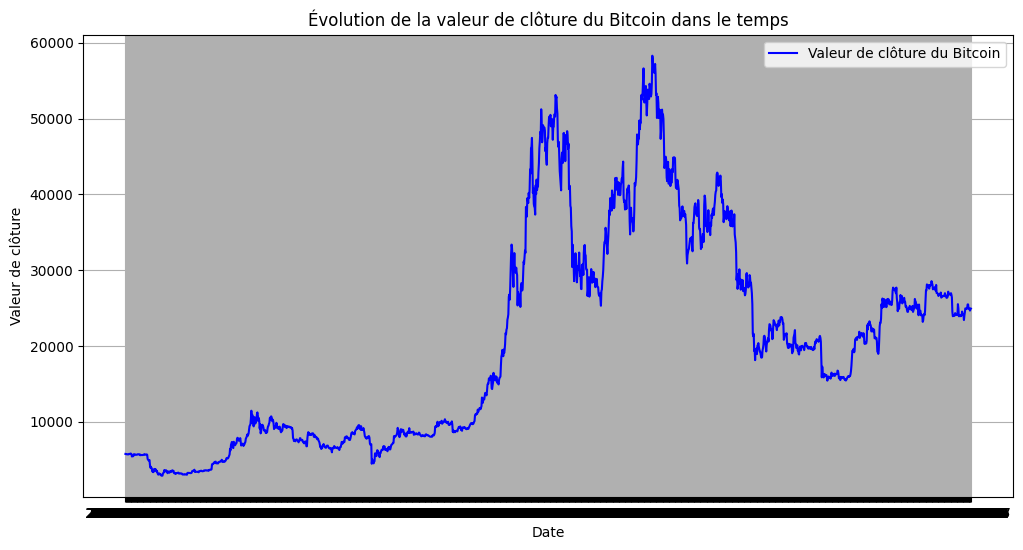

In [122]:
# Afficher le graphique d'évolution de la valeur du bitcoin à la clôture, colonne "Close"

plt.figure(figsize=(12, 6))
plt.plot(Data_bit['Date'], Data_bit['Close'], label='Valeur de clôture du Bitcoin', color='b')

plt.xlabel('Date')
plt.ylabel('Valeur de clôture')
plt.title("Évolution de la valeur de clôture du Bitcoin dans le temps")
plt.legend()
plt.grid(True)

plt.show()


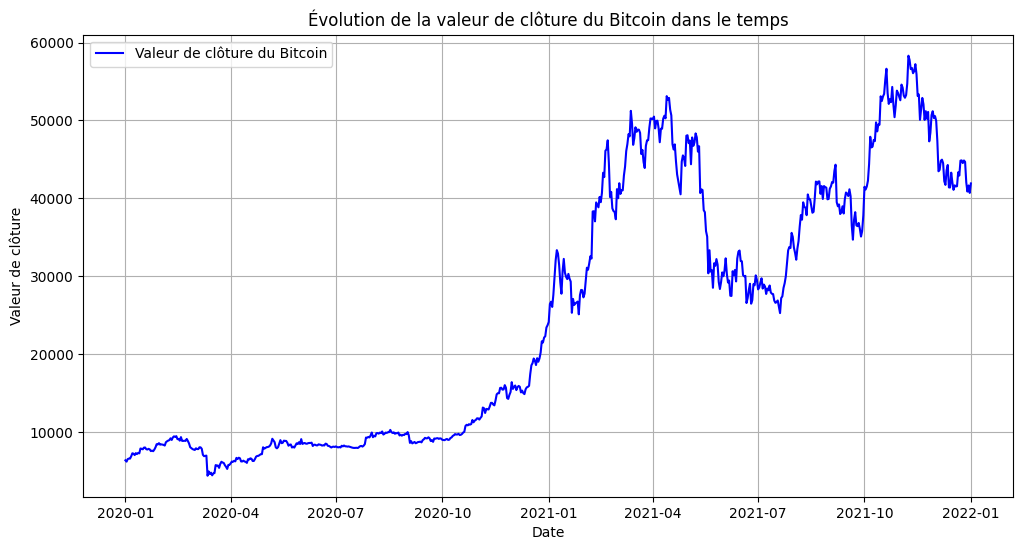

In [123]:
# Afficher le graphique d'évolution de la valeur du bitcoin à la clôture, colonne "Close" entre 2020 et 2022
plt.figure(figsize=(12, 6))

Data_bit['Date'] = pd.to_datetime(Data_bit['Date'])
data_filtre = Data_bit[(Data_bit['Date'] >= '01-01-2020') & (Data_bit['Date'] <= '01-01-2022')]

plt.plot(data_filtre['Date'], data_filtre['Close'], label='Valeur de clôture du Bitcoin', color='b')
plt.xlabel('Date')
plt.ylabel('Valeur de clôture')
plt.title("Évolution de la valeur de clôture du Bitcoin dans le temps")
plt.legend()
plt.grid(True)
plt.show()

In [124]:
# Calculer la moyenne de cloture tous les mois
# Indication: Utiliser la fonction resample
Data_bit.set_index('Date', inplace=True)
mean_close = Data_bit['Close'].resample('M').mean()
mean_close



Date
2018-09-30     5713.733398
2018-10-31     5644.774761
2018-11-30     4754.266423
2018-12-31     3267.105563
2019-01-31     3241.492786
                  ...     
2023-05-31    25308.297316
2023-06-30    25512.766016
2023-07-31    27227.380922
2023-08-31    25609.057712
2023-09-30    24502.497541
Freq: M, Name: Close, Length: 61, dtype: float64

In [125]:
# Charger les données temporelles d'une autre crypto monnaie et merger les 2 dataframes
# Les données sont téléchargeables ici :
# Source https://fr.finance.yahoo.com/
# Comparer l'évolution des 2 crypto monnaies à la clôture pour une même période.
# Indication: Utiliser

In [126]:
Data_bit_2 = pd.read_csv("/content/BTC-EUR(2).csv")


In [128]:
Data_bit_2['Date'] = pd.to_datetime(Data_bit_2['Date'])
merged_data = pd.merge(Data_bit, Data_bit_2, on='Date', suffixes=('_Bitcoin_1', '_Bitcoin_2'))
merged_data

,Date,Open_Bitcoin_1,High_Bitcoin_1,Low_Bitcoin_1,Close_Bitcoin_1,Adj Close_Bitcoin_1,Volume_Bitcoin_1,Open_Bitcoin_2,High_Bitcoin_2,Low_Bitcoin_2,Close_Bitcoin_2,Adj Close_Bitcoin_2,Volume_Bitcoin_2
0,2022-10-06,20339.806641,20584.394531,20323.841797,20384.904297,20384.904297,35458437285,20339.806641,20584.394531,20323.841797,20384.904297,20384.904297,35458437285
1,2022-10-07,20387.066406,20428.861328,19867.556641,20070.548828,20070.548828,30010373624,20387.066406,20428.861328,19867.556641,20070.548828,20070.548828,30010373624
2,2022-10-08,20070.013672,20126.863281,19804.421875,19924.640625,19924.640625,16867541219,20070.013672,20126.863281,19804.421875,19924.640625,19924.640625,16867541219
3,2022-10-09,19925.576172,20053.908203,19855.570313,19975.679688,19975.679688,17295505469,19925.576172,20053.908203,19855.570313,19975.679688,19975.679688,17295505469
4,2022-10-10,19975.669922,20015.492188,19685.085938,19710.349609,19710.349609,28240067025,19975.669922,20015.492188,19685.085938,19710.349609,19710.349609,28240067025
...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2023-09-23,24918.466797,25111.501953,24866.294922,24924.990234,24924.990234,9920219726,24918.466797,25111.501953,24866.294922,24924.990234,24924.990234,9920219726
353,2023-09-24,24924.041016,24976.207031,24869.617188,24924.822266,24924.822266,6943757707,24924.041016,24976.207031,24869.617188,24924.822266,24924.822266,6943757707
354,2023-09-25,24924.808594,25032.384766,24622.509766,24657.968750,24657.968750,7693979394,24924.808594,25032.384766,24622.509766,24657.968750,24657.968750,7693979394
355,2023-09-26,24655.103516,24945.947266,24474.373047,24829.972656,24829.972656,11327874247,24655.103516,24945.947266,24474.373047,24829.972656,24829.972656,11327874247


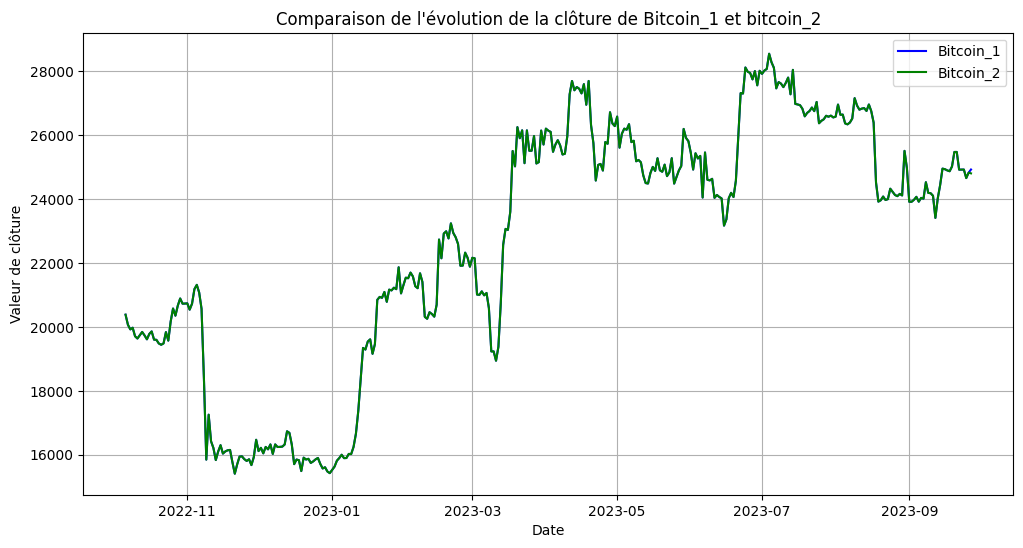

In [129]:
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Date'], merged_data['Close_Bitcoin_1'], label='Bitcoin_1', color='b')
plt.plot(merged_data['Date'], merged_data['Close_Bitcoin_2'], label='Bitcoin_2', color='g')
plt.xlabel('Date')
plt.ylabel('Valeur de clôture')
plt.title("Comparaison de l'évolution de la clôture de Bitcoin_1 et bitcoin_2")
plt.legend()
plt.grid(True)

plt.show()